In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")


from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 500 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

2021-11-08 18:07:52.837132: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-08 18:07:52.837163: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load and Subset Data

<Item title:"SAC_Enhancement_Wetlands_Monitoring_RT" type:Feature Layer Collection owner:Anooshi>
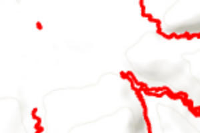

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('39b11ef71b194d26a0eb591cec8b55c8')

wetlands = output['data0']
records = output['table0']
feature_service = output['feature_service']

In [3]:
#Merge related records and feature
data = wetlands.merge(records, left_on='GlobalID', right_on='Ref_to_Wetlands', how='inner')

data = data.drop(columns=['Ref_to_Wetlands','GlobalID_x'])
data = data.rename(columns={'OBJECTID_x':'Point_ID','OBJECTID_y':'Record_ID','GlobalID_y':'Record_GlobalID'})

In [4]:
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 32


In [5]:
sub.head()

,Point_ID,BHR_Site,Wetland_ID,Wetland_Type,Shape__Area,Shape__Length,SHAPE,Record_ID,Observation_Date,Surveyor_1,Surveyor_2,Areal_Extent_Review,Dom_Plant,Dom_Plant_Cover,Dom_NNIP,Dom_NNIP_Cover,Dom_Hydrology_Indicator,Hydric_Soil_Indicator,Percent_Bare_Ground,Crt_Disturbance_Level,Crt_Disturbance_Level_Comment,Crt_Threat,Crt_Threat_Comments,Potential_Enhancement_Actions,Comments,Record_GlobalID
3,1,SAC,WT5.2a,Wetland Tributary,1467.520508,436.776952,"{'rings': [[[6187205.49510814, 2037272.2702605...",169,2021-06-02 15:54:08,Kevin Sherrill,None,Unchanged,Festuca perennis (FAC),22,Carduus pycnocephalus (Moderate),1-25%,Other (Explain in comments),None,10,Low,A cattle trail crosses the drainage.,Low,"Some erosion and down cutting, but it is not g...",Other (explain in comments),There are no obvious hydrology indicators. Bu...,5338746c-d40c-4d3c-88da-9100490147a3
7,2,SAC,SW4.1c,Seasonal Wetland,1362.727539,212.380863,"{'rings': [[[6184606.63547647, 2036523.8377023...",197,2021-06-04 15:45:41,Kevin Sherrill,None,Smaller,Juncus phaeocephalus (FACW),50,None,0%,Sediment Deposits (B2) (Nonriverine),None,20,Low,Some bioturbation from small mammals.,Moderate,"Extensive rooting seen nearby, this feature co...",Other (explain in comments),"Small mammal burrows seen within feature, incr...",02e73131-91db-417f-9741-3ddeb635447e
11,3,SAC,SP6.0a,Seep Wetland,463.203125,88.424926,"{'rings': [[[6189614.44173381, 2038116.3341892...",168,2021-06-01 20:11:27,Kevin Sherrill,None,Smaller,Baccharis salicifolia (FAC),15,Torilis arvensis,1-25%,Other (Explain in comments),None,0,High,"Conium maculatum infestation, was recently spr...",Low,Potential COMA or DIGR to spread.,NNIP Removal,No standing water or any hydrological signs th...,df02475d-47e8-43e7-aad6-efa8f211310f
15,4,SAC,WT7.2b,Wetland Tributary,3168.214844,515.662219,"{'rings': [[[6188115.5628418, 2038478.59658806...",196,2021-06-04 15:04:46,Kevin Sherrill,None,Unchanged,Elymus triticoides (FAC),25,Dittrichia graveolens (Moderate),1-25%,BioticCrust,None,15,Low,No major sediment deposition this year. Drough...,Moderate,Erosion features upstream pose a risk to sedim...,Other (explain in comments),Stabilize upstream erosions features.,472e5a82-7ae0-450b-9f86-4cd8f8fe8988
19,5,SAC,SW1.1c,Seasonal Wetland,2584.128906,450.291662,"{'rings': [[[6181797.4435883, 2035564.95543373...",177,2021-06-02 18:17:10,Kevin Sherrill,None,Unchanged,Elymus triticoides (FAC),30,Mentha pulegium (Moderate),1-25%,Other (Explain in comments),None,5,Low,Light cattle grazing and minor erosion.,Low,Carduus pycnocephalus is expanding into featur...,NNIP Removal,"Drought conditions, soils are very dry. Juncus...",13971514-0d41-48e0-b010-2c822aff33f1


# QAQC

In [6]:
validate_domains(feature_service)



Table/Layer:  Observations


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Ryan Swanson, Joy Stewart}"
0,Surveyor_2,"{Ryan Swanson, Joy Stewart, Richard Graham-Bruno}"




Table/Layer:  Enhancement_Wetlands


No Mismatches Found


In [7]:
QAQC_whitespace(data, exclude_cols=['Crt_Disturbance_Level_Comment','Crt_Threat_Comments','Comments'], objectID = ['Record_ID'] )



Analysis for: Areal_Extent_Review
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SHAPE
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Crt_Disturbance_Level
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Hydric_Soil_Indicator
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Dom_Plant
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Crt_Threat
No \xa0 characters found
No double spaces found
No tri

In [8]:
# QAQC Find blank entries
find_blank_entries(data, exclude_cols=['Dom_NNIP','Hydric_Soil_Indicator','Crt_Disturbance_Level_Comment','Comments','Crt_Threat_Comments','Surveyor_2'])

No blank Areal_Extent_Review
No blank SHAPE
No blank Crt_Disturbance_Level
No blank Dom_Plant_Cover
No blank Crt_Threat
No blank Dom_Hydrology_Indicator
No blank Surveyor_1
No blank Point_ID
No blank Observation_Date
No blank Percent_Bare_Ground
No blank BHR_Site
No blank Dom_Plant
No blank Shape__Area
No blank Dom_NNIP_Cover
Blank Potential_Enhancement_Actions entrie(s) exist!


,Point_ID,BHR_Site,Wetland_ID,Wetland_Type,Shape__Area,Shape__Length,SHAPE,Record_ID,Observation_Date,Surveyor_1,Surveyor_2,Areal_Extent_Review,Dom_Plant,Dom_Plant_Cover,Dom_NNIP,Dom_NNIP_Cover,Dom_Hydrology_Indicator,Hydric_Soil_Indicator,Percent_Bare_Ground,Crt_Disturbance_Level,Crt_Disturbance_Level_Comment,Crt_Threat,Crt_Threat_Comments,Potential_Enhancement_Actions,Comments,Record_GlobalID
4,2,SAC,SW4.1c,Seasonal Wetland,1362.727539,212.380863,"{'rings': [[[6184606.63547647, 2036523.8377023], [6184607.91532956...",68,2018-04-24 21:10:14,Rusty Hutto,Joy Stewart,Unchanged,Juncus phaeocephalus (FACW),80,None,0%,SurfaceWater,None,3,Low,Very little disturbance.,Low,None,None,No NNIPs visible in wetland.,5eb1ace4-a1ad-4c83-959e-eb94e741b812
5,2,SAC,SW4.1c,Seasonal Wetland,1362.727539,212.380863,"{'rings': [[[6184606.63547647, 2036523.8377023], [6184607.91532956...",100,2019-05-08 16:19:29,Kevin Sherrill,Mizael Seminatore,Unchanged,Juncus phaeocephalus (FACW),80,None,0%,SurfaceWater,None,2,Low,Very little disturbance.,Low,None,None,No NNIPs visible within wetland.,d5b2cefe-ef2f-4650-bc88-42385f7a0f5e
28,8,SAC,WT4.1m,Wetland Tributary,4026.332031,1616.914109,"{'rings': [[[6186769.50254181, 2035412.28185456], [6186772.3440715...",74,2018-04-24 18:54:24,Rusty Hutto,Joy Stewart,Unchanged,Eleocharis macrostachya (OBL),20,None,0%,SurfaceWater,None,70,Low,Some bank erosion present.,Low,Erosion,None,Lots of bare ground along trib. Too early for most NNIPs.,7cbc5eae-3604-48a6-8200-104ab8c93172
29,8,SAC,WT4.1m,Wetland Tributary,4026.332031,1616.914109,"{'rings': [[[6186769.50254181, 2035412.28185456], [6186772.3440715...",126,2019-05-08 19:16:02,Kevin Sherrill,Mizael Seminatore,Unchanged,Eleocharis macrostachya (OBL),15,Carduus pycnocephalus (Moderate),1-25%,SurfaceWater,None,75,Low,Bank erosion and soil compaction from cattle trampling.,Low,Erosion,None,Still a few pools with tadpoles present.,da0f834b-e60b-4c3f-b18a-bf39ff73fa0a
32,9,SAC,SW4.1n,Seasonal Wetland,29192.160156,3938.679714,"{'rings': [[[6186945.14851597, 2035160.97363015], [6186946.1823065...",75,2018-04-24 18:29:19,Rusty Hutto,Joy Stewart,Unchanged,Eleocharis macrostachya (OBL),20,Carduus pycnocephalus (Moderate),1-25%,SurfaceWater,None,50,Moderate,Slumps on hillsides. Bank erosion.,Low,"Some erosion, but nothing major.",None,None,6e60416d-589a-4c97-9c5d-b9f9eae46972
60,16,SAC,WT4.1s,Wetland Tributary,4306.010742,1031.834290,"{'rings': [[[6187577.89331347, 2034224.3603459], [6187576.0284878,...",82,2018-04-24 18:22:13,Joy Stewart,Rusty Hutto,Wider,Eleocharis macrostachya (OBL),30,Cynodon dactylon (Moderate),1-25%,SurfaceWater,None,25,Low,Some erosion from hillside.,Low,Potential for increase of erosion into wetland.,None,"Boulders from hillside eroded into wetland, does not appear to be ...",4cb7a55e-e398-4f7d-afca-64b35b0e9350
61,16,SAC,WT4.1s,Wetland Tributary,4306.010742,1031.834290,"{'rings': [[[6187577.89331347, 2034224.3603459], [6187576.0284878,...",125,2019-05-08 18:56:31,Kevin Sherrill,Mizael Seminatore,Wider,Eleocharis macrostachya (OBL),25,Dittrichia graveolens (Moderate),1-25%,SurfaceWater,None,20,Low,Some bank slumping and erosion from hillside.,Low,Erosion and sedimentation loads to tributary. Pools that are used ...,None,Potential for erosion.,d19192bc-844a-4427-9530-48bb95a6075b
76,20,SAC,SW4.1i,Wetland Tributary,1394.510742,677.325291,"{'rings': [[[6186146.60582171, 2034574.43838589], [6186148.3741908...",86,2018-04-24 17:26:36,Joy Stewart,Rusty Hutto,Wider,Hordeum marinum subsp. gussoneanum (FAC),30,None,0%,SurfaceWater,None,10,Low,Minimal disturbance; low impact from cattle or NNIPs.,Low,No apparent threats.,None,"Lots of grasses without flowers, difficult to ID. No identifiable ...",a51ae42e-4920-4945-be27-b82b604eb7d5
77,20,SAC,SW4.1i,Wetland Tributary,1394.510742,677.325291,"{'rings': [[[6186146.60582171, 2034574.43838589], [6186148.3741908...",129,2019-05-08 20:32:26,Kevin Sherrill,Mizael Seminatore,Wider,Festuca perennis (FAC),15,None,0%,SurfaceWate

No blank Wetland_Type
No blank Shape__Length
No blank Record_ID
No blank Wetland_ID
No blank Record_GlobalID


In [9]:
data.columns

Index(['Point_ID', 'BHR_Site', 'Wetland_ID', 'Wetland_Type', 'Shape__Area',
       'Shape__Length', 'SHAPE', 'Record_ID', 'Observation_Date', 'Surveyor_1',
       'Surveyor_2', 'Areal_Extent_Review', 'Dom_Plant', 'Dom_Plant_Cover',
       'Dom_NNIP', 'Dom_NNIP_Cover', 'Dom_Hydrology_Indicator',
       'Hydric_Soil_Indicator', 'Percent_Bare_Ground', 'Crt_Disturbance_Level',
       'Crt_Disturbance_Level_Comment', 'Crt_Threat', 'Crt_Threat_Comments',
       'Potential_Enhancement_Actions', 'Comments', 'Record_GlobalID'],
      dtype='object')

/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


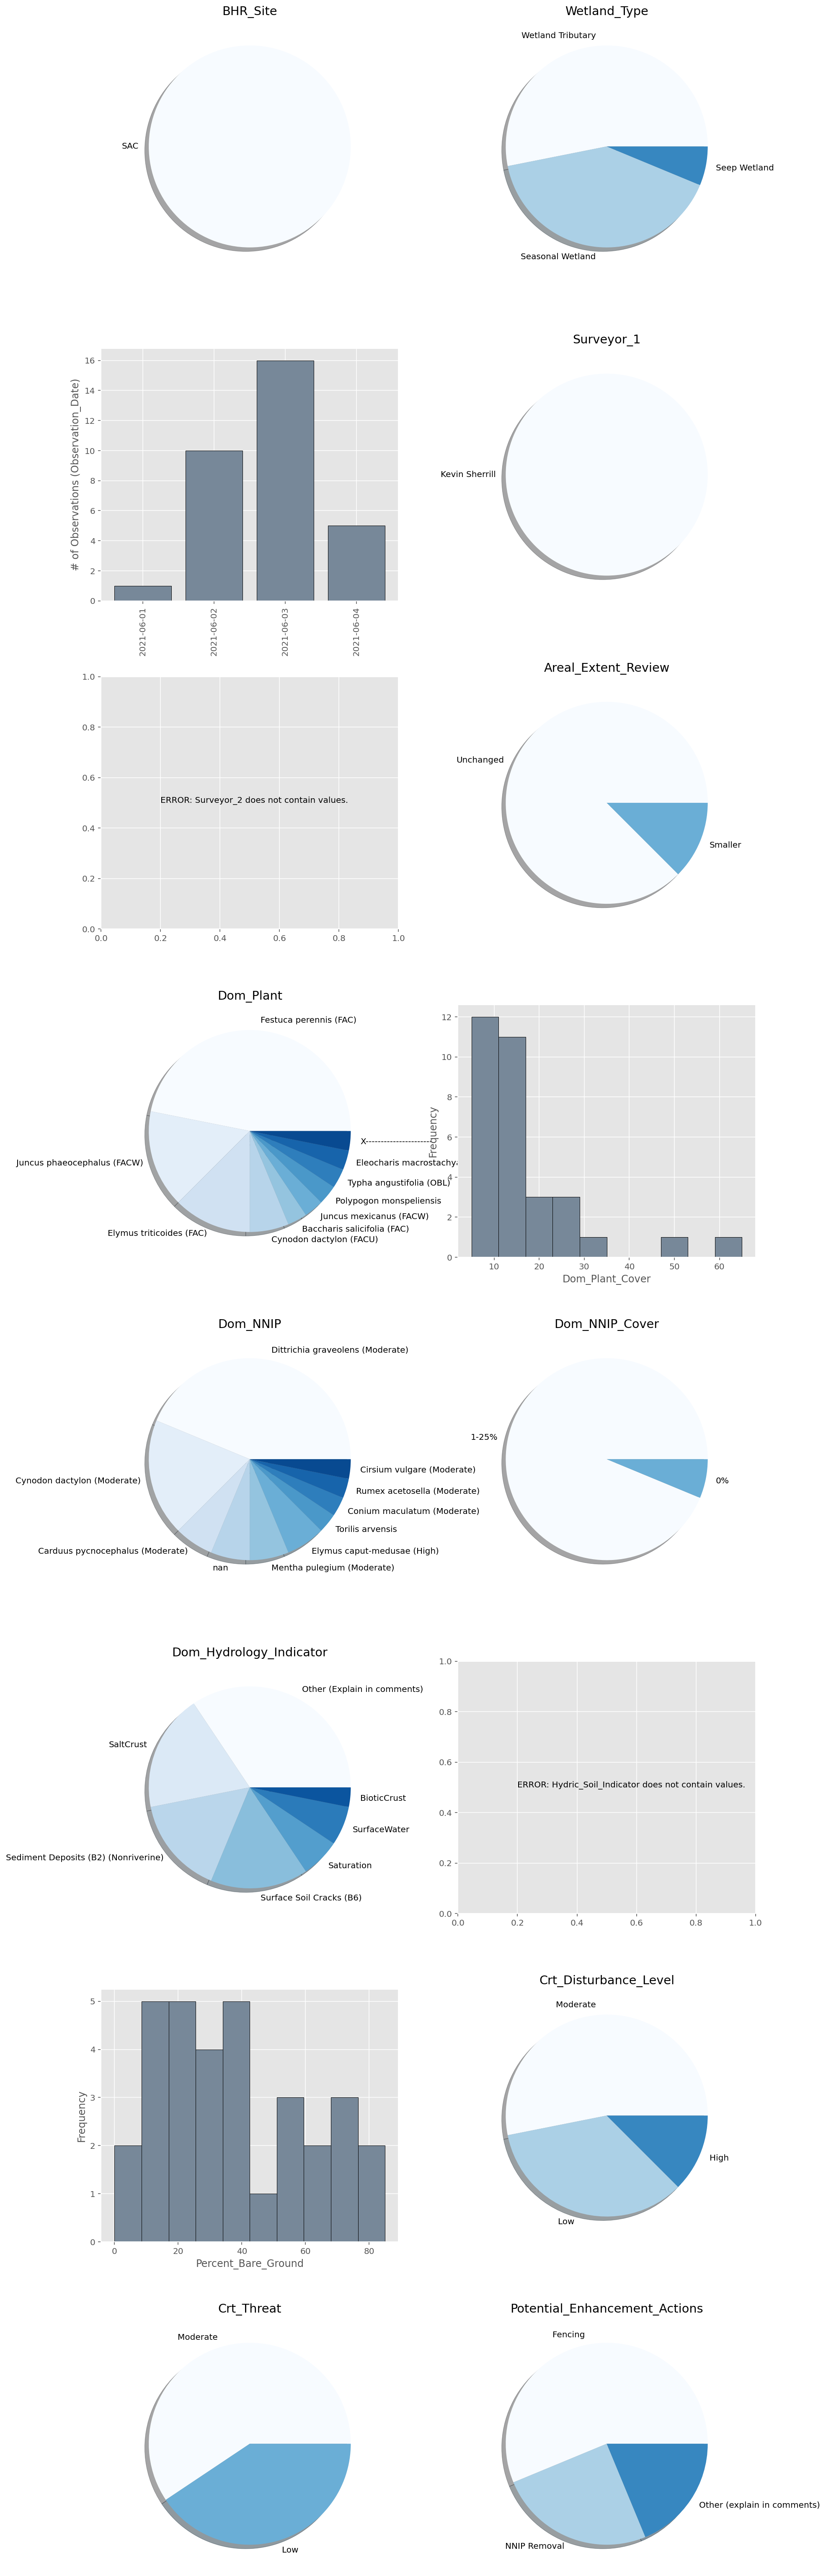

In [10]:
# histogram and pie charts for select columns
QAQC_plot(sub, ['BHR_Site', 'Wetland_Type',
       'Observation_Date',
       'Surveyor_1', 'Surveyor_2', 'Areal_Extent_Review', 'Dom_Plant',
       'Dom_Plant_Cover', 'Dom_NNIP', 'Dom_NNIP_Cover',
       'Dom_Hydrology_Indicator', 'Hydric_Soil_Indicator',
       'Percent_Bare_Ground', 'Crt_Disturbance_Level',
        'Crt_Threat',
       'Potential_Enhancement_Actions'])

Dom_Plant_Cover  Outlier: True
See Outlier Entries Below:


,Point_ID,BHR_Site,Wetland_ID,Wetland_Type,Shape__Area,Shape__Length,SHAPE,Record_ID,Observation_Date,Surveyor_1,Surveyor_2,Areal_Extent_Review,Dom_Plant,Dom_Plant_Cover,Dom_NNIP,Dom_NNIP_Cover,Dom_Hydrology_Indicator,Hydric_Soil_Indicator,Percent_Bare_Ground,Crt_Disturbance_Level,Crt_Disturbance_Level_Comment,Crt_Threat,Crt_Threat_Comments,Potential_Enhancement_Actions,Comments,Record_GlobalID,Dom_Plant_Cover_Outlier
7,2,SAC,SW4.1c,Seasonal Wetland,1362.727539,212.380863,"{'rings': [[[6184606.63547647, 2036523.8377023], [6184607.91532956...",197,2021-06-04 15:45:41,Kevin Sherrill,None,Smaller,Juncus phaeocephalus (FACW),50,None,0%,Sediment Deposits (B2) (Nonriverine),None,20,Low,Some bioturbation from small mammals.,Moderate,"Extensive rooting seen nearby, this feature could easy be uprooted...",Other (explain in comments),"Small mammal burrows seen within feature, increasing bare ground a...",02e73131-91db-417f-9741-3ddeb635447e,True
27,7,SAC,SW1.1a,Seasonal Wetland,4266.081055,449.948813,"{'rings': [[[6182026.59043972, 2036590.68664998], [6182025.5274497...",179,2021-06-02 19:07:43,Kevin Sherrill,None,Unchanged,Elymus triticoides (FAC),65,Conium maculatum (Moderate),1-25%,Surface Soil Cracks (B6),None,10,Low,MENPUL and COMA present.,Low,"COMA infiltration from edges, spread of MEPU within wetland. Cirsi...",NNIP Removal,COMA herbicide spraying (round 2) occurred today.,4a47aae9-37fa-452b-ba1c-3a60af397d4a,True


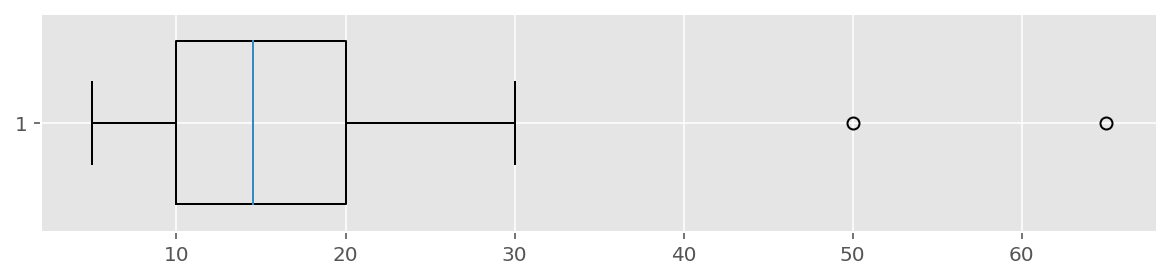

Percent_Bare_Ground  Outlier: False


In [11]:
# looks for outliers in continuous data
outlier = find_outlier(sub,['Dom_Plant_Cover','Percent_Bare_Ground'])

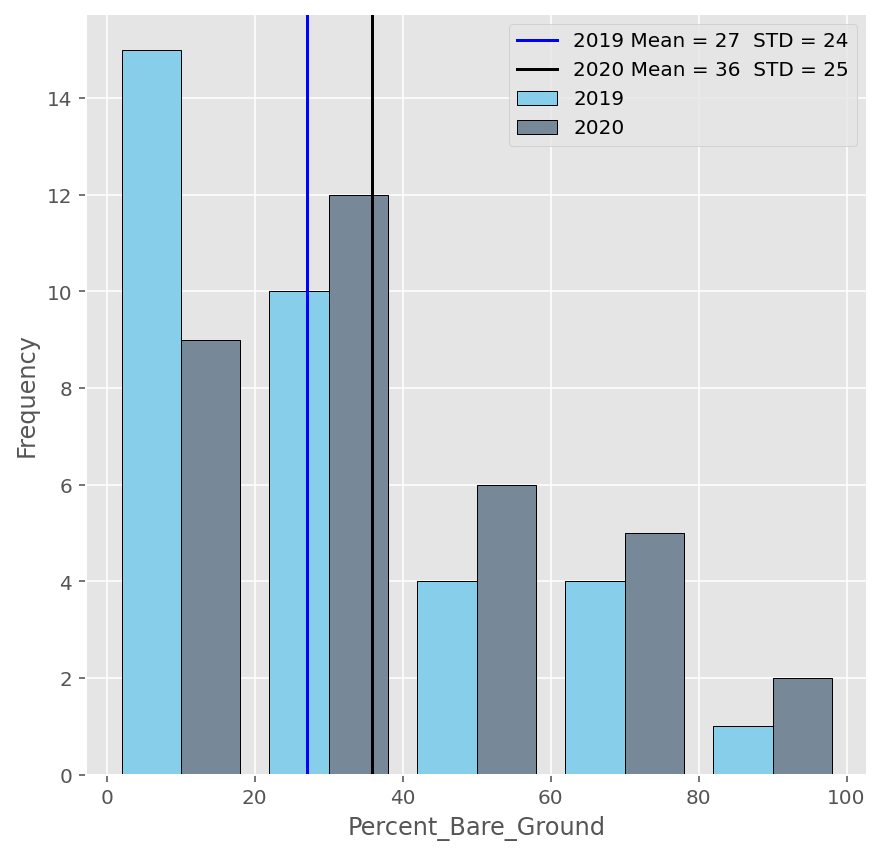

In [12]:
# compare continuous data between years- bare ground. 
compare_years_continuous(data, 'Percent_Bare_Ground', '2019', '2020', 20)

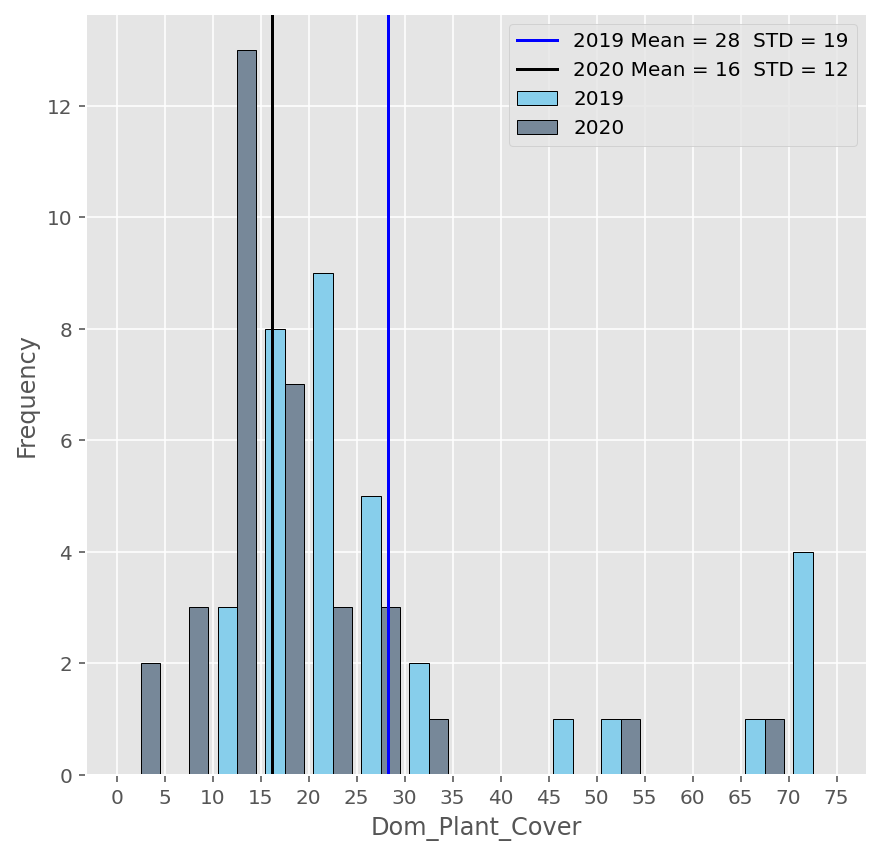

In [13]:
# compare continuous data between years- bare ground. 
compare_years_continuous(data, 'Dom_Plant_Cover', '2019', '2020', 5)

ERROR: Surveyor_2 does not contain values.


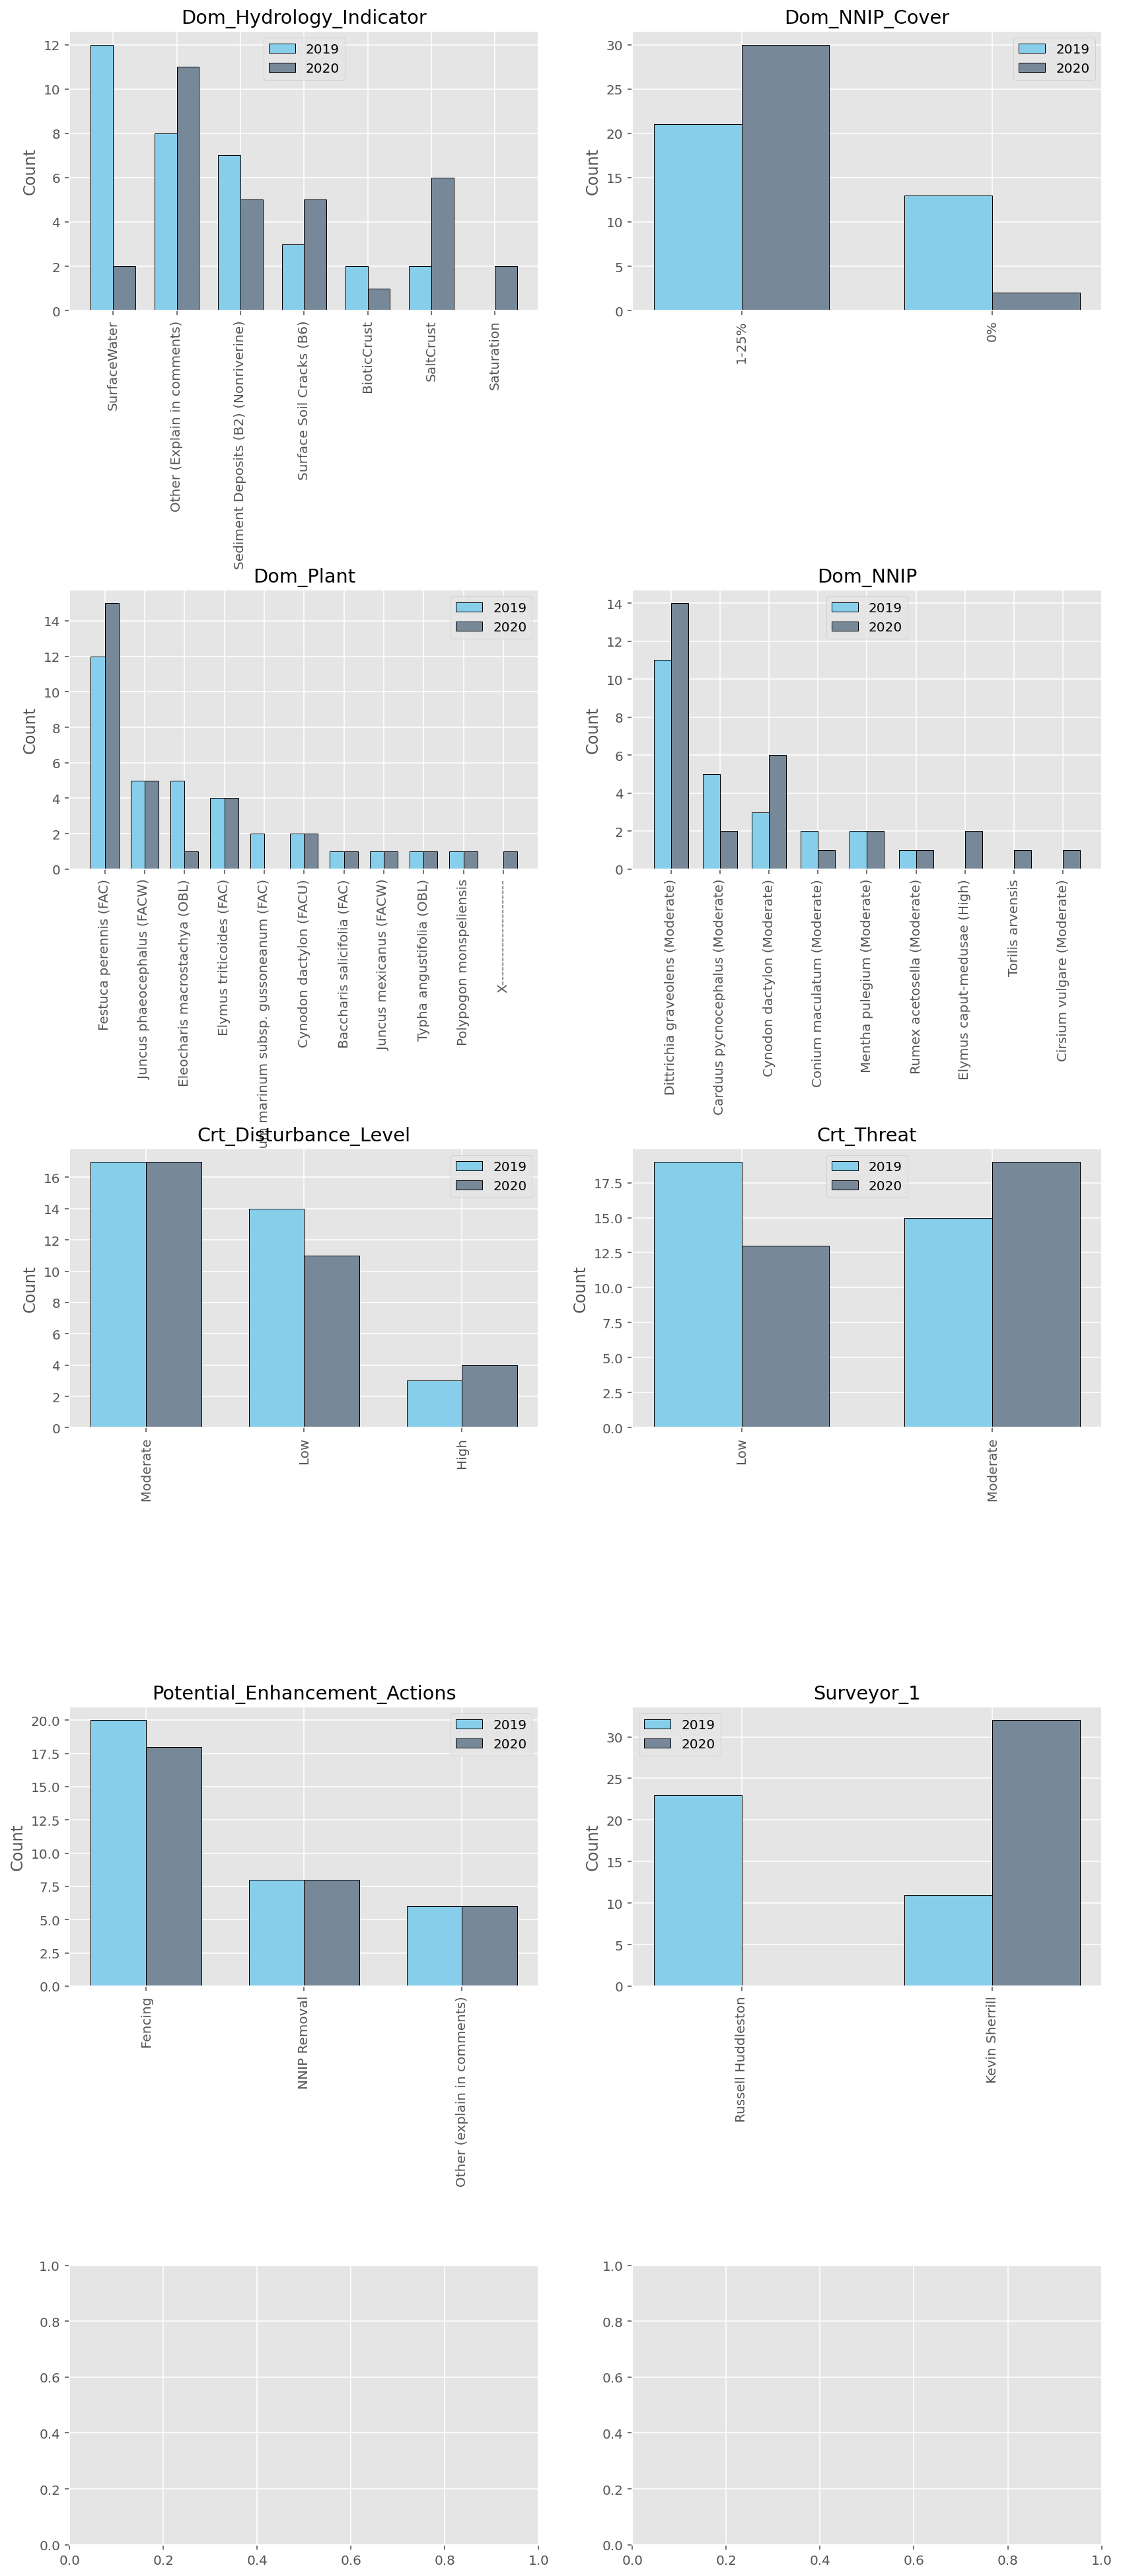

In [14]:
# compare disturbance categorical data between years
compare_years_catagorical(data, [ 'Dom_Hydrology_Indicator', 'Dom_NNIP_Cover','Dom_Plant', 'Dom_NNIP',
       'Crt_Disturbance_Level', 'Crt_Threat', 'Potential_Enhancement_Actions', 'Surveyor_1','Surveyor_2'], '2019', '2020') 


In [15]:
QAQC_attachment_filenames(feature_service)


No attachments for layer/table Enhancement_Wetlands



No mislabeled photos found for layer/table Observations


In [16]:
#QAQC CHECK if Dominant Plant Cover and bare ground exceed 100%
data['DomCover_BGCover'] = data.Percent_Bare_Ground + data.Dom_Plant_Cover

result = data.loc[data.DomCover_BGCover > 100,:]

if result.empty:
    print('No Error: All Dominate plant cover + bare ground cover are < 100%')
else:
    print('ERROR Dominate cover + bare ground cover is above 100%:')
    display(result)

No Error: All Dominate plant cover + bare ground cover are < 100%


# Data Deliverable

In [38]:
data.columns

Index(['Point_ID', 'BHR_Site', 'Wetland_ID', 'Wetland_Type', 'Shape__Area',
       'Shape__Length', 'SHAPE', 'Record_ID', 'Observation_Date', 'Surveyor_1',
       'Surveyor_2', 'Areal_Extent_Review', 'Dom_Plant', 'Dom_Plant_Cover',
       'Dom_NNIP', 'Dom_NNIP_Cover', 'Dom_Hydrology_Indicator',
       'Hydric_Soil_Indicator', 'Percent_Bare_Ground', 'Crt_Disturbance_Level',
       'Crt_Disturbance_Level_Comment', 'Crt_Threat', 'Crt_Threat_Comments',
       'Potential_Enhancement_Actions', 'Comments', 'Record_GlobalID',
       'DomCover_BGCover'],
      dtype='object')

In [43]:
field_order = ['BHR_Site',
'Observation_Date',
'Surveyor_1',
'Surveyor_2',
'Wetland_ID',
 'Wetland_Type',
'Areal_Extent_Review',
'Dom_Plant',
'Dom_Plant_Cover',
'Dom_NNIP', 
'Dom_NNIP_Cover',
'DomCover_BGCover',
'Hydric_Soil_Indicator',
'Dom_Hydrology_Indicator',
'Percent_Bare_Ground',
'Crt_Disturbance_Level',
'Crt_Disturbance_Level_Comment',
'Crt_Threat', 
'Crt_Threat_Comments',
'Potential_Enhancement_Actions',
'Comments',
'Point_ID',
'Record_ID',
'Record_GlobalID',
'Shape__Area',
'Shape__Length',
'SHAPE']

In [44]:
export_data_deliverable(data, feature_service, field_order, file_name='SAC_Enhancement_Wetlands_Monitoring')

Exported to Outputs/SAC_Enhancement_Wetlands_Monitoring_Data_20210913.xlsx
